Ex1:


In [1]:
import torch
import numpy as np

a = np.random.rand(6,2)
b = torch.rand(4,3)
c = torch.rand(3,4)

print(b)
#numpy to tensor
a1 = torch.from_numpy(a)
print('convert numpy array to tensor: ', a1)

#tensor reshape
a2 = torch.reshape(a1,(3,4))
print('tensor reshape: ', a2)


#transpose
b1 = torch.transpose(b, 0, 1)
print('transpose tensor: ', b1)

#addition
e = a2 +b1
print('sum tensor: ', e)

#element-wise
ew = e*c
print('element-wise: ', ew)

#multi
mm = torch.matmul(e, torch.transpose(c, 0, 1).double())
print('multi tensor: ', mm)

#tensor to numpy
print('tensor to numpy:', mm.numpy(), type(mm.numpy()))


tensor([[0.6057, 0.7244, 0.5485],
        [0.9995, 0.9173, 0.8585],
        [0.4288, 0.9398, 0.8702],
        [0.1811, 0.5613, 0.1200]])
convert numpy array to tensor:  tensor([[0.2344, 0.1041],
        [0.5730, 0.8188],
        [0.1486, 0.7816],
        [0.0953, 0.9006],
        [0.5329, 0.6447],
        [0.6318, 0.9816]], dtype=torch.float64)
tensor reshape:  tensor([[0.2344, 0.1041, 0.5730, 0.8188],
        [0.1486, 0.7816, 0.0953, 0.9006],
        [0.5329, 0.6447, 0.6318, 0.9816]], dtype=torch.float64)
transpose tensor:  tensor([[0.6057, 0.9995, 0.4288, 0.1811],
        [0.7244, 0.9173, 0.9398, 0.5613],
        [0.5485, 0.8585, 0.8702, 0.1200]])
sum tensor:  tensor([[0.8401, 1.1036, 1.0018, 0.9999],
        [0.8730, 1.6990, 1.0351, 1.4620],
        [1.0814, 1.5032, 1.5020, 1.1017]], dtype=torch.float64)
element-wise:  tensor([[0.1551, 0.1663, 0.7025, 0.0144],
        [0.1820, 1.0867, 0.8592, 0.6323],
        [0.1867, 1.3003, 0.1357, 0.0814]], dtype=torch.float64)
multi tensor:  ten

Ex2:





Epoch [10/200], Loss: 29727.2246
Epoch [20/200], Loss: 6072.2627
Epoch [30/200], Loss: 1466.5054
Epoch [40/200], Loss: 567.8226
Epoch [50/200], Loss: 390.5724
Epoch [60/200], Loss: 353.7360
Epoch [70/200], Loss: 344.2442
Epoch [80/200], Loss: 340.0930
Epoch [90/200], Loss: 337.0006
Epoch [100/200], Loss: 334.1330
Epoch [110/200], Loss: 331.3287
Epoch [120/200], Loss: 328.5549
Epoch [130/200], Loss: 325.8059
Epoch [140/200], Loss: 323.0803
Epoch [150/200], Loss: 320.3774
Epoch [160/200], Loss: 317.6973
Epoch [170/200], Loss: 315.0395
Epoch [180/200], Loss: 312.4040
Epoch [190/200], Loss: 309.7905
Epoch [200/200], Loss: 307.1989


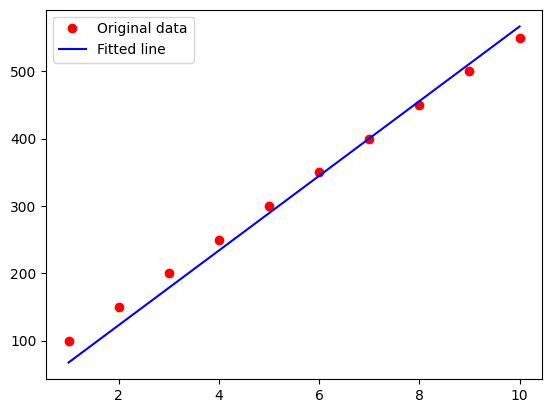

In [2]:
from torch import nn, optim
import matplotlib.pyplot as plt


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.l1 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.l1(x)
        return x

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float32).reshape(-1, 1)
y = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550], dtype=np.float32).reshape(-1, 1)

x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)


model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 200
for epoch in range(num_epochs):
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


predicted = model(x_tensor).detach().numpy()
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, 'b', label='Fitted line')

plt.legend()
plt.show()



Ex3:

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [5]:

data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()

])

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = data_transform
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = data_transform
)



train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_data_loader = DataLoader(test_data, batch_size = 64, shuffle = True)


100%|██████████| 26421880/26421880 [00:06<00:00, 4390974.41it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 256083.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1790174.51it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10910700.85it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



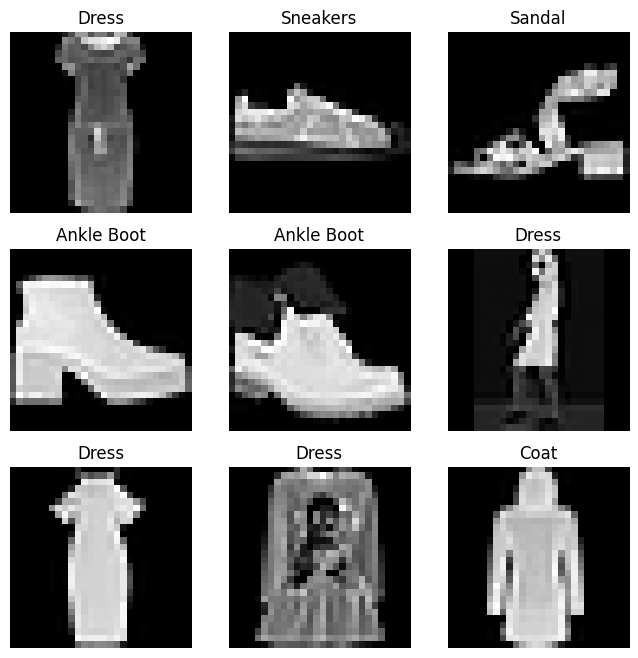

In [6]:
lables_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullovers',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneakers',
    8: 'Bag',
    9: 'Ankle Boot',
}


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

for i in range(1, cols * rows + 1):
    img = images[i]
    label = labels[i].item()

    figure.add_subplot(rows, cols, i)
    plt.title(lables_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()


In [7]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.layer_stack = nn.Sequential(
      nn.Conv2d(1,5,3),
      nn.ReLU(),
      nn.Conv2d(5,10,3),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(10 * 24 * 24, 120),
      nn.Linear(120, 84),
      nn.Linear(84, 10),
    )

  def forward(self, x):
    return self.layer_stack(x)

model = SimpleCNN()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model = model.to(device)
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_dataloader):.4f}')

Epoch [10/100], Loss: 0.2251
Epoch [20/100], Loss: 0.1737
Epoch [30/100], Loss: 0.1489
Epoch [40/100], Loss: 0.1346
Epoch [50/100], Loss: 0.1243
Epoch [60/100], Loss: 0.1149
Epoch [70/100], Loss: 0.1100
Epoch [80/100], Loss: 0.1029
Epoch [90/100], Loss: 0.0998
Epoch [100/100], Loss: 0.0918


In [9]:
model.eval()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]


    for images, labels in test_data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(labels.size(0)):
            label = labels[i].item()
            pred = predicted[i].item()
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f} %')

    for i in range(10):
        if n_class_samples[i] > 0:
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        else:
            acc = 0.0
        print(f'Accuracy of class {i}: {acc:.2f} %')



Accuracy of the network: 88.22 %
Accuracy of class 0: 79.70 %
Accuracy of class 1: 97.20 %
Accuracy of class 2: 84.20 %
Accuracy of class 3: 89.90 %
Accuracy of class 4: 78.90 %
Accuracy of class 5: 94.40 %
Accuracy of class 6: 70.30 %
Accuracy of class 7: 96.00 %
Accuracy of class 8: 97.30 %
Accuracy of class 9: 94.30 %


Ex4:

In [10]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.25, 0.25, 0.25])
])

training_data = datasets.CIFAR10(
    root = "data",
    train = True,
    download = True,
    transform = data_transform
)

test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    transform = data_transform
)

#0: "airplane", 1: "car"
def get_car_plane_indices(dataset):
    return [i for i, (_, label) in enumerate(dataset) if label in [0, 1]]

car_plane_indices = get_car_plane_indices(training_data)
train_subset = Subset(training_data, car_plane_indices)


train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
car_plane_indices_test = get_car_plane_indices(test_data)
test_subset = Subset(test_data, car_plane_indices_test)
test_dataloader = DataLoader(test_subset, batch_size=64, shuffle=True)

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

100%|██████████| 170498071/170498071 [00:02<00:00, 59697407.88it/s]


Extracting data/cifar-10-python.tar.gz to data


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s] 


In [11]:
model = model.to(device)
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_dataloader):.4f}')

print("Finished Training!")

Epoch [1/5], Loss: 0.3166
Epoch [2/5], Loss: 0.2219
Epoch [3/5], Loss: 0.2072
Epoch [4/5], Loss: 0.1875
Epoch [5/5], Loss: 0.1836
Finished Training!


In [13]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 92.40%


In [14]:
torch.save(model.state_dict(), 'resnet18.pth')
print("Model saved successfully!")

Model saved successfully!


In [15]:
model.load_state_dict(torch.load('resnet18.pth'))
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


/tmp/ipykernel_35/1633057361.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('resnet18.pth'))


Test Accuracy: 93.10%
